In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
import os
drive_path = '/content/drive/My Drive'
os.chdir(os.path.join(drive_path, 'Seismology/data8PMB/SRM'))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
import numpy as np
from numpy.fft import rfft, irfft
import scipy.signal as sig
import scipy.io.wavfile as wav
from glob import glob

In [0]:
with open('rct-uop-021115.data.00025.srm', "rb") as ff:
  data = np.fromfile(ff, dtype=np.uint16,count=4*16*10000000)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def to_volts(arr):
  return (((arr/2**16)*5)-2.5)*2

In [0]:
chans = {idx: to_volts(data[idx::4]) for idx in range(4)}
del data

In [0]:
psd = {}
for idx in range(4):
  ff, psd[idx] = sig.welch(chans[idx], fs=1e7, nperseg=2**20)

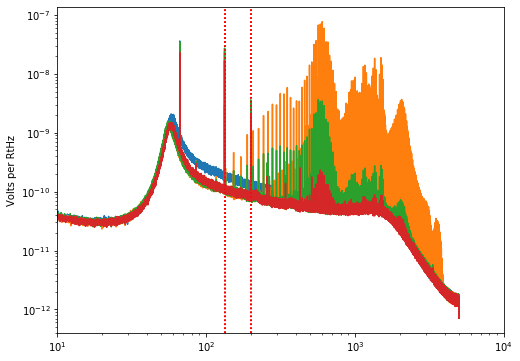

In [156]:
plt.figure(figsize=(8,6))
for idx in range(4):
  plt.loglog(ff/1.e3, psd[idx])
  plt.axvline(132951.7364501953/1e3, ls=':', c='r')
  plt.axvline(199422.8/1e3, ls=':', c='r')
  plt.xlim(1e1,1e4)
  plt.ylabel('Volts per RtHz')

Text(0, 0.5, 'Volts per RtHz')

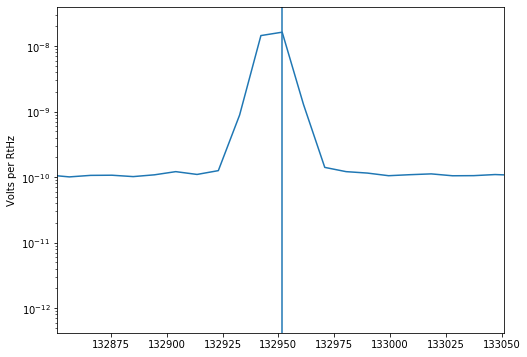

In [57]:
§plt.figure(figsize=(8,6))
plt.loglog(ff, psd[idx])
plt.axvline(132951.7364501953)
plt.xlim(132951-100, 132951+100)
plt.xscale('linear')
plt.ylabel('Volts per RtHz')

In [0]:
filt = sig.firwin(999999, [100000, 132951.7-100, 132951.7+100, 199422.8-100, 199422.8+100],
                  pass_zero=False, window='hann', fs=1e7)
def filter(arr):
  return sig.fftconvolve(arr-np.mean(arr), filt, mode='same')

In [0]:
fchans = {idx: filter(chans[idx][:40000000]) for idx in range(4)}

In [0]:
_, tstpsd = sig.welch(tryit, fs=1e7, nperseg=2**20)

(1e-11, 1e-07)

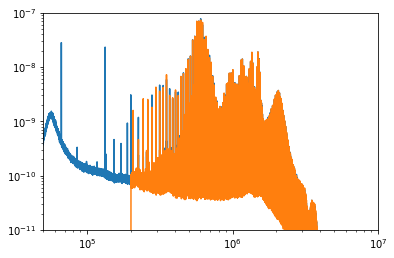

In [160]:
plt.loglog(ff, psd[1])
plt.loglog(ff, tstpsd)
plt.xlim(50000,1e7)
plt.ylim(1e-11, 1e-7)

In [0]:
idxmax = fchans[3].argmax()

In [0]:
tmp = fchans[1][idxmax-10000:idxmax+10000].astype(np.float32)
tmp = tmp - tmp.mean()
tmp /= np.max(np.abs(tmp))
wav.write('scream.wav', 5000, tmp)

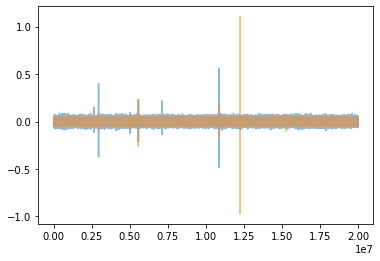

In [216]:
plt.plot(fchans[1][10000000:30000000], alpha=0.5)
plt.plot(fchans[2][10000000:30000000], alpha=0.5)

In [0]:
def rms(arr):
  marr = np.mean(arr)
  return np.array([sum((arr[idx:idx+100000] - marr)**2) for idx in range(0,len(arr)-100000, 100000)])

In [0]:
rms0 = rms(chans[0])
rms1 = rms(chans[1])
rms2 = rms(chans[2])
rms3 = rms(chans[3])

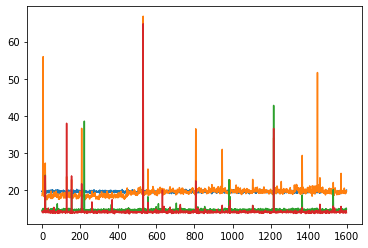

In [155]:
plt.plot(rms0)
plt.plot(rms1)
plt.plot(rms2)
plt.plot(rms3)

In [0]:
sig.find_peaks(th)

In [0]:
peak_fs = ff[psd[0].argsort()[-4:]]

In [0]:
1/6

0.16666666666666666

In [0]:
6000 / .16 

37500.0